# Homework 9

You are to implement following edge detectors with thresholds :  
(a) Robert's Operator: 12  
(b) Prewitt's Edge Detector: 24  
(c) Sobel's Edge Detector: 38  
(d) Frei and Chen's Gradient Operator: 30  
(e) Kirsch's Compass Operator: 135  
(f) Robinson's Compass Operator: 43  
(g) Nevatia-Babu 5x5 Operator: 12500

In [1]:
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def Robert(img, threshold):
    new_img = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            r1 = int(img[i+1][j+1]) - int(img[i][j])
            r2 = int(img[i+1][j]) - int(img[i][j+1])
            gradient = math.sqrt(r1 * r1 + r2 * r2)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [3]:
def Prewitt(img, threshold):
    new_img = img.copy()
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            p1 = int(img[i+1][j+1]) + int(img[i+1][j]) + int(img[i+1][j-1])
            p1 -= (int(img[i-1][j+1]) + int(img[i-1][j]) + int(img[i-1][j-1]))
            p2 = int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1])
            p2 -= (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i+1][j-1]))
            gradient = math.sqrt(p1 * p1 + p2 * p2)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [4]:
def Sobel(img, threshold):
    new_img = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            s1 = int(img[i+1][j+1]) + int(img[i+1][j]) * 2 + int(img[i+1][j-1])
            s1 -= (int(img[i-1][j+1]) + int(img[i-1][j]) * 2 + int(img[i-1][j-1]))
            s2 = int(img[i-1][j+1]) + int(img[i][j+1]) * 2 + int(img[i+1][j+1])
            s2 -= (int(img[i-1][j-1]) + int(img[i][j-1]) * 2 + int(img[i+1][j-1]))
            gradient = math.sqrt(s1 * s1 + s2 * s2)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [5]:
def FreiAndChen(img, threshold):
    new_img = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            s1 = int(img[i+1][j+1]) + int(img[i+1][j]) * math.sqrt(2) + int(img[i+1][j-1])
            s1 -= (int(img[i-1][j+1]) + int(img[i-1][j]) * math.sqrt(2) + int(img[i-1][j-1]))
            s2 = int(img[i-1][j+1]) + int(img[i][j+1]) * math.sqrt(2) + int(img[i+1][j+1])
            s2 -= (int(img[i-1][j-1]) + int(img[i][j-1]) * math.sqrt(2) + int(img[i+1][j-1]))
            gradient = math.sqrt(s1 * s1 + s2 * s2)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [6]:
def Kirsch(img, threshold):
    new_img = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            k0 = 5 * (int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]))
            k0 -= 3 * (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i+1][j-1]) + int(img[i-1][j]) + int(img[i+1][j]))
            k1 = 5 * (int(img[i-1][j]) + int(img[i-1][j+1]) + int(img[i][j+1]))
            k1 -= 3 * (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i+1][j-1]) + int(img[i+1][j]) + int(img[i+1][j+1]))
            k2 = 5 * (int(img[i-1][j+1]) + int(img[i-1][j]) + int(img[i-1][j-1]))
            k2 -= 3 * (int(img[i+1][j+1]) + int(img[i+1][j]) + int(img[i+1][j-1]) + int(img[i][j-1]) + int(img[i][j+1]))
            k3 = 5 * (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i-1][j]))
            k3-= 3 * (int(img[i+1][j-1]) + int(img[i+1][j]) + int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]))
            k4 = 5 * (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i+1][j-1]))
            k4 -= 3 * (int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]) + int(img[i][j-1]) + int(img[i][j+1]))
            k5 = 5 * (int(img[i][j-1]) + int(img[i+1][j-1]) + int(img[i+1][j]))
            k5 -= 3 * (int(img[i-1][j+1]) + int(img[i][j+1]) + int(img[i+1][j+1]) + int(img[i-1][j-1]) + int(img[i-1][j]))
            k6 = 5 * (int(img[i+1][j+1]) + int(img[i+1][j]) + int(img[i+1][j-1]))
            k6 -= 3 * (int(img[i-1][j+1]) + int(img[i-1][j]) + int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i][j+1]))
            k7 = 5 *(int(img[i][j+1]) + int(img[i+1][j]) + int(img[i+1][j+1]))
            k7 -= 3 * (int(img[i-1][j-1]) + int(img[i][j-1]) + int(img[i+1][j-1]) + int(img[i-1][j]) + int(img[i-1][j+1]))
            gradient = max(k0, k1, k2, k3, k4, k5, k6, k7)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [7]:
def Robinson(img, threshold):
    new_img = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            r0 = int(img[i-1][j+1]) + 2 * int(img[i][j+1]) + int(img[i+1][j+1])
            r0 -= (int(img[i-1][j-1]) + 2 * int(img[i][j-1]) + int(img[i+1][j-1]))
            r1 = int(img[i-1][j]) + 2 * int(img[i-1][j+1]) + int(img[i][j+1])
            r1 -= (int(img[i][j-1]) + 2 * int(img[i+1][j-1]) + int(img[i+1][j]))
            r2 = int(img[i-1][j-1]) + 2 * int(img[i-1][j]) + int(img[i-1][j+1])
            r2 -= (int(img[i+1][j-1]) + 2 * int(img[i+1][j]) + int(img[i+1][j+1]))
            r3 = 2 * int(img[i-1][j-1]) + int(img[i-1][j]) + int(img[i][j-1])
            r3-= (int(img[i][j+1]) + int(img[i+1][j]) + 2 * int(img[i+1][j+1]))
            r4 = int(img[i-1][j-1]) + 2 * int(img[i][j-1]) + int(img[i+1][j-1])
            r4 -= (int(img[i-1][j+1]) + 2 * int(img[i][j+1]) + int(img[i+1][j+1]))
            r5 = int(img[i][j-1]) + 2 * int(img[i+1][j-1]) + int(img[i+1][j])
            r5 -= (int(img[i-1][j]) + 2 * int(img[i-1][j+1]) + int(img[i][j+1]))
            r6 = int(img[i+1][j-1]) + 2 * int(img[i+1][j]) + int(img[i+1][j+1])
            r6 -= (int(img[i-1][j-1]) + 2 * int(img[i-1][j]) + int(img[i-1][j+1]))
            r7 = int(img[i][j+1]) + int(img[i+1][j]) + 2 * int(img[i+1][j+1])
            r7 -= (2 * int(img[i-1][j-1]) + int(img[i-1][j]) + int(img[i][j-1]))
            gradient = max(r0, r1, r2, r3, r4, r5, r6, r7)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [8]:
def NevatiaBabu(img, threshold):
    new_img = img.copy()
    for i in range(2, img.shape[0]-2):
        for j in range(2, img.shape[1]-2):
            n0 = 100 * (int(img[i-2][j-2]) + int(img[i-2][j-1]) + int(img[i-2][j]) + int(img[i-2][j+1]) + int(img[i-2][j+2]))
            n0 += 100 * (int(img[i-1][j-2]) + int(img[i-1][j-1]) + int(img[i-1][j]) + int(img[i-1][j+1]) + int(img[i-1][j+2]))
            n0 -= 100 * (int(img[i+1][j-2]) + int(img[i+1][j-1]) + int(img[i+1][j]) + int(img[i+1][j+1]) + int(img[i+1][j+2]))
            n0 -= 100 * (int(img[i+2][j-2]) + int(img[i+2][j-1]) + int(img[i+2][j]) + int(img[i+2][j+1]) + int(img[i+2][j+2]))

            n1 = 100 * (int(img[i-2][j-2]) + int(img[i-2][j-1]) + int(img[i-2][j]) + int(img[i-2][j+1]) + int(img[i-2][j+2]))
            n1 += 100 * (int(img[i-1][j-2]) + int(img[i-1][j-1]) + int(img[i-1][j])) + 78 * int(img[i-1][j+1]) - 32 * int(img[i-1][j+2])
            n1 += 100 * int(img[i][j-2]) + 92 * int(img[i][j-1]) - 92 * int(img[i][j+1]) - 100 * int(img[i][j+2])
            n1 += 32 * int(img[i+1][j-2]) - 78 * int(img[i+1][j-1]) - 100 * (int(img[i+1][j]) + int(img[i+1][j+1]) + int(img[i+1][j+2]))
            n1 -= 100 * (int(img[i+2][j-2]) + int(img[i+2][j-1]) + int(img[i+2][j]) + int(img[i+2][j+1]) + int(img[i+2][j+2]))

            n2 = 100 * (int(img[i-2][j-2]) + int(img[i-2][j-1]) + int(img[i-2][j])) + 32 * int(img[i-2][j+1]) - 100 * int(img[i-2][j+2])
            n2 += 100 * int(img[i-1][j-2]) + 100 * int(img[i-1][j-1]) + 92 * int(img[i-1][j]) - 78 * int(img[i-1][j+1]) - 100 * int(img[i-1][j+2])
            n2 += 100 * int(img[i][j-2]) + 100 * int(img[i][j-1]) - 100 * int(img[i][j+1]) - 100 * int(img[i][j+2])
            n2 += 100 * int(img[i+1][j-2]) + 78 * int(img[i+1][j-1]) - 92 * int(img[i+1][j]) - 100 * int(img[i+1][j+1]) - 100 * int(img[i+1][j+2])
            n2 += 100 * int(img[i+2][j-2]) - 32 * int(img[i+2][j-1]) - 100 * int(img[i+2][j]) - 100 * int(img[i+2][j+1]) - 100 * int(img[i+2][j+2])

            n3 = (-100) * int(img[i-2][j-2]) - 100 * int(img[i-2][j-1]) + 100 * int(img[i-2][j+1]) + 100 * int(img[i-2][j+2])
            n3 += (-100) * int(img[i-1][j-2]) - 100 * int(img[i-1][j-1]) + 100 * int(img[i-1][j+1]) + 100 * int(img[i-1][j+2])
            n3 += (-100) * int(img[i][j-2]) - 100 * int(img[i][j-1]) + 100 * int(img[i][j+1]) + 100 * int(img[i][j+2])
            n3 += (-100) * int(img[i+1][j-2]) - 100 * int(img[i+1][j-1]) + 100 * int(img[i+1][j+1]) + 100 * int(img[i+1][j+2])
            n3 += (-100) * int(img[i+2][j-2]) - 100 * int(img[i+2][j-1]) + 100 * int(img[i+2][j+1]) + 100 * int(img[i+2][j+2])

            n4 = (-100) * int(img[i-2][j-2]) + 32 * int(img[i-2][j-1]) + 100 * int(img[i-2][j]) + 100 * int(img[i-2][j+1]) + 100 * int(img[i-2][j+2])
            n4 += (-100) * int(img[i-1][j-2]) - 78 * int(img[i-1][j-1]) + 92* int(img[i-1][j]) + 100 * int(img[i-1][j+1]) + 100 * int(img[i-1][j+2])
            n4 += (-100) * int(img[i][j-2]) - 100 * int(img[i][j-1]) + 100 * int(img[i][j+1]) + 100 * int(img[i][j+2])
            n4 += (-100) * int(img[i+1][j-2]) - 100 * int(img[i+1][j-1]) - 92 * int(img[i+1][j]) + 78 * int(img[i+1][j+1]) + 100 * int(img[i+1][j+2])
            n4 += (-100) * int(img[i+2][j-2]) - 100 * int(img[i+2][j-1]) - 100 * int(img[i+2][j]) - 32 * int(img[i+2][j+1]) + 100 * int(img[i+2][j+2])
            
            n5 = 100 * (int(img[i-2][j-2]) + int(img[i-2][j-1]) + int(img[i-2][j]) + int(img[i-2][j+1]) + int(img[i-2][j+2]))
            n5 += (-32) * int(img[i-1][j-2]) + 78 * int(img[i-1][j-1]) + 100 * int(img[i-1][j]) + 100 * int(img[i-1][j+1]) + 100 * int(img[i-1][j+2])
            n5 += (-100) * int(img[i][j-2]) - 92 * int(img[i][j-1]) + 92 * int(img[i][j+1]) + 100 * int(img[i][j+2])
            n5 += (-100) * int(img[i+1][j-2]) - 100 * int(img[i+1][j-1]) - 100 * int(img[i+1][j]) - 78 * int(img[i+1][j+1]) + 32 * int(img[i+1][j+2])
            n5 -= 100 * (int(img[i+2][j-2]) + int(img[i+2][j-1]) + int(img[i+2][j]) + int(img[i+2][j+1]) + int(img[i+2][j+2]))
            gradient = max(n0, n1, n2, n3, n4, n5)
            if gradient > threshold:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [9]:
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

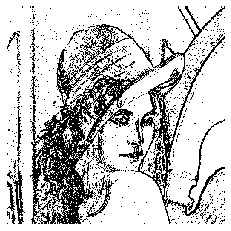

In [11]:
#Robert's Operator
show_result(Robert(img, 12))

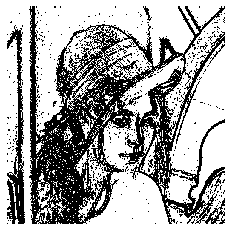

In [12]:
#Prewitt's Edge Detector
show_result(Prewitt(img, 24))

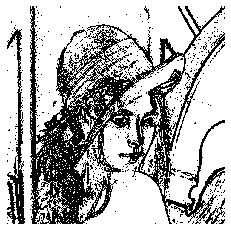

In [13]:
#Sobel's Edge Detector
show_result(Sobel(img, 38))

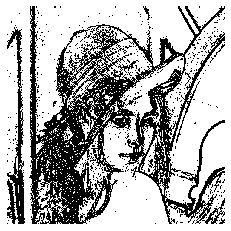

In [14]:
#Frei and Chen's Gradient Operator
show_result(FreiAndChen(img, 30))

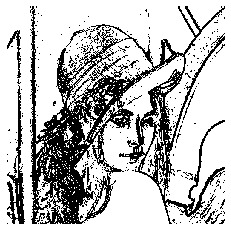

In [15]:
#Kirsch's Compass Operator
show_result(Kirsch(img, 135))

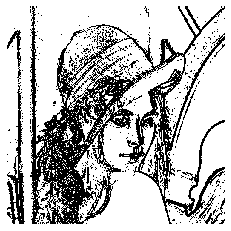

In [16]:
#Robinson's Compass Operator
show_result(Robinson(img, 43))

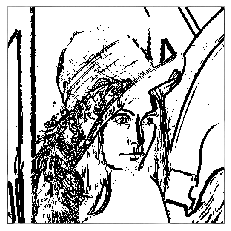

In [17]:
#Nevatia-Babu 5x5 Operator
show_result(NevatiaBabu(img, 12500))